# Analyzing the Stroop Effect:
In this project, we will investigate a classic phenomenon from experimental psychology called the [**Stroop Effect**](https://en.wikipedia.org/wiki/Stroop_effect). We will look at some data collected from others who have performed the experiment and we will compute some statistics describing the results.

## Overview
First, we need to get to know our data, by printing some examples and the type of each variable. Then we clean and reorganize the variables before proceeding to the part of answering our question and making vizualisation.
We will need to import pandas since we will be using our dataframes, and matplotlib to make some visualisations

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
import scipy.stats as stats

The first step is importing the data we have, which is called *stroopdata.csv*, our file is a csv format, we will read it into a DataFrame.

In [5]:
stroop_data = pd.read_csv('stroopdata.csv')

Let's get to know our data and what variables we have, to do so we print the header and the first three rows

In [6]:
stroop_data.head(3)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214


## Background and Dataset Explination

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a **congruent** words condition, and an **incongruent** words condition. *In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: (e. RED wrotten in RED ink). In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: (e.  PURPLE wrotten in ORANGE ink).* 
In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition, and that's what we have as a dataset.

In [7]:
## Let's look at our varibales type
stroop_data.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


# Time to answer our question:

**1. What is the independent variable? What is the dependent variable?**

- The independent variable : The type of test ( congruent / incogruent )
- The dependent variable : The response time in second

**2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform?**

We want to evaluate the effect on the performance of the participants and see whether the difference in our sample is because of the fact the congruent and incongruent test are significantly different.

- μC : The congruent population's response time mean
- μI : The incongruent population's response time mean

An appropriate set of hypotheses :

- **H0 : The null hypothesis, that the congruent and incongruent populations are not significantly different (μC − μI = 0)**
- **HA : The alternative hypothesis, that the congruent and incongruent populations are significantly different (μC − μI ≠ 0)**

In our case:

- The sample size is below 30. (from stroop_data.info(1) (24 entries) )
- The same participant is measured at two time points.

**Therefore, we will conduct a Dependent t-test for Paired Samples.**

**3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.**

In [8]:
stroop_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


- The congruent sample has a mean of  **x̄C = 14.051** seconds and a standard deviation **σC = 3.559** seconds.
- The incongruent sample has a mean of  **x̄I = 22.016** seconds and a standard deviation **σI = 4.797** seconds.

**4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

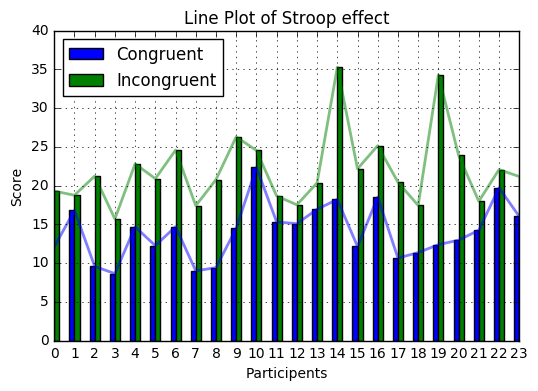

In [30]:
stroop_data.plot(kind='bar')
stroop_data.Congruent.plot(kind = 'line', color = 'b',label = 'Congruent',linewidth=2,alpha = 0.5,grid = True)
stroop_data.Incongruent.plot(color = 'g',label = 'Incongruent',linewidth=2, alpha = 0.5,grid = True)
plt.xlabel('Participents')              
plt.ylabel('Score')
plt.title('Line Plot of Stroop effect')

- When plotting this area graph, all participants took longer to answer when tested on the incongruent way.

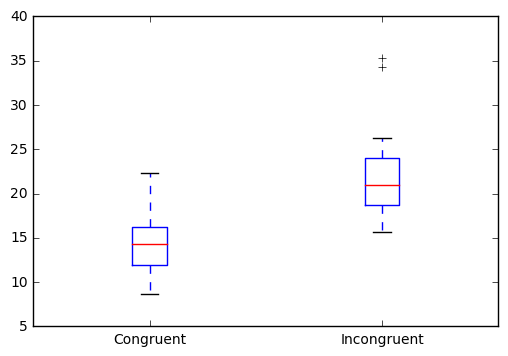

In [42]:
color = dict(boxes='Blue', whiskers='Blue', medians='Red', caps='Black')
stroop_data.plot.box(color = color, sym = 'r+')

- In this boxplot it is obvious that the median for the incongruent task is higher than those of the congruent task.

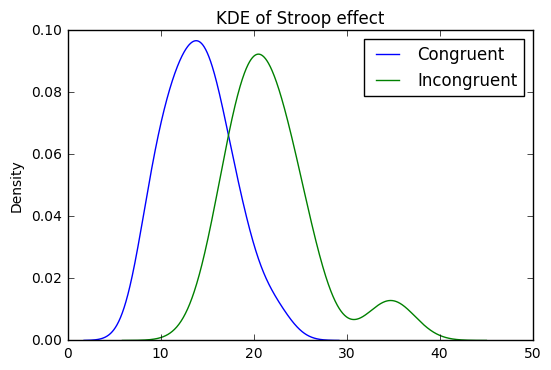

In [48]:
stroop_data.plot.kde()
plt.title('KDE of Stroop effect')

- Both samples look normally distributed with a similar variance.
- The incongruent task distribution of performance times seems to have a small peak around 35 seconds

**5 . Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations? **

As  explained in question 2, we will investigate our data using T-Test statistical.

In [133]:
# Calculte the mean of each test
mean_congurent = stroop_data['Congruent'].mean()
mean_incongurant = stroop_data['Incongruent'].mean()

# Calculte a point estimate using (mean_congurent - mean_incongurant) / Average of differences
estimate_point = mean_congurent - mean_incongurant

# Calculate Square of Sums of difference of sample means
ssd = sum( ( (stroop_data['Congruent'] - stroop_data['Incongruent']) - estimate_point ) ** 2  )

# Calculate the variance of difference
vd = ssd / (24 -1)

# Calculate Standard Deviation of Differences
sdd = vd ** (1/2)
############################################
# We can get this result easily using pandas std() 
# but before we have to add a column this way
# stroop_data['difference'] = stroop_data['Incongruent'] - stroop_data['Congruent']
# sdt = stroop_data.std()
# sdd = sdt['difference']
############################################

#  calculate the t-statistic for the difference
tstatistic = estimate_point / ( sdd / ( 24 ** (1/2) ) )

############################################
# We could find t-statistic easily importing stats from scipy.stats
# import scipy.stats as stats
# stats.ttest_rel(a = stroop_data['Congruent'], b = stroop_data['Incongruent'])
# Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)
# then we get the tstatistic  and the p value
############################################

# Calculate the Degrees of Freedom (n -1)
df = 23

# Calculte the chances of seeing a result as extreme as the one we observed (known as the p-value)
pvalue = stats.t.cdf(x = tstatistic, df = 23 ) * 2 

# Clacute t-critical for alpha level 0.005 (aiming to 99% confidence level)
alpha = 0.005
tcritical = stats.t.ppf(q=alpha, df=23)

In [134]:
print("Degrees of Freedom : df =", df)
print("Alpha- level : a =", alpha)
print("t-critical values :  tc  =", -tcritical, tcritical)
print("t-Statistic(df) : t(23) =", tstatistic)
print("p-value : p =", pvalue)

Degrees of Freedom : df = 23
Alpha- level : a = 0.005
t-critical values :  tc  = 2.80733568377 -2.80733568377
t-Statistic(df) : t(23) = -8.02070694411
p-value : p = 4.10300058571e-08


*If the calculated t-statistic is greater than the critical t-value, the test concludes that there is a statistically significant difference between the two populations. Therefore, you reject the null hypothesis that there is no statistically significant difference between the two populations.*

**We observe that**

- The t-Statistic is clearly smaller than the negative t-critical value 
- In the critical region with a p-value < 0.0001 

**Therefore we reject the Null Hypothesis with a 99% Confidence level and conclude that there is a significant difference in the scores for congruent and incongruent tasks.**

The results match up with our observations and expectations that there is indeed a statistically significant difference in the response time to perform the incongruent test compared to the congruent test.

**6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

After doing some research about the Stroop Effect, there are two main areas in the brain that are involved in the processing of the Stroop task. One involves activating the areas of the brain related to color perception, The other focus on the word. 

There many theories that may explain the Stroop effect, here is two of them:
- *Speed of Processing Theory*: the interference occurs because the brean reads faster than it recognizes colors.
- *Selective Attention Theory*: the interference occurs because recognizing of colors requires more attention than reading words.

Alternative tasks to try:
- Use emotional words such as "sad", "happy", "depressed" or "angry" mixed with neutral words such as "pen", "door" or "jeans", the words are colored and the participant is supposed to name the color. *  Research has revealed that individuals that are depressed are more likely to say the color of a negative word slower than the color of a neutral word *

## References

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html
http://www.statisticshowto.com/probability-and-statistics/
https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
https://en.wikipedia.org/wiki/Stroop_effect
https://www.kaggle.com/anouarz/kernels/notebooks/new?forkParentScriptVersionId=1761024